## Question 1 

### 1a) load train dataset and split into train, cross-validation and test dataframes

In [1]:
import os
import numpy as np
import pandas as pd
import os
np.random.seed(1234)
train_ds = pd.read_csv('~/Desktop/Final_Project/train_dataset.csv')
test_ds = pd.read_csv('~/Desktop/Final_Project/test_dataset.csv')
IDtest = test_ds["RT13Id"]
print(train_ds.info())
print(test_ds.info())

#Split into train, cv, and test 
#train_t, cv_t, test_t = np.split(train.sample(frac=1), [int(.6*len(train_ds)), int(.8*len(train_ds))])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51088 entries, 0 to 51087
Data columns (total 34 columns):
RT13Id                               51088 non-null int64
IsBadBuy                             51088 non-null int64
PurchDate                            51088 non-null object
Auction                              51088 non-null object
PaintingYear                         51088 non-null int64
PaintingAge                          51088 non-null int64
Artist                               51088 non-null object
PaintingName                         51088 non-null object
Trim                                 49395 non-null object
SubType                              51084 non-null object
CanvasColor                          51084 non-null object
Market                               51083 non-null object
FrameTypeID                          48847 non-null float64
FrameType                            48843 non-null object
Bids                                 51088 non-null int64
Nationalit

#### join train and test

In [2]:
train_len = len(train_ds)
df = pd.concat(objs=[train_ds, test_ds], axis = 0).reset_index(drop=True)

### 1b) scatterplot for current retail clean price vs current retail avg price

### Answer: The relationship is linear.

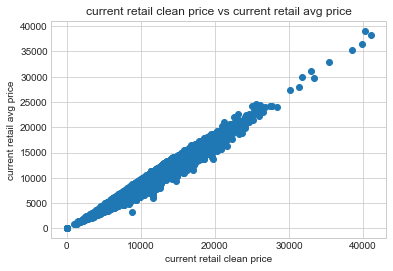

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.scatter(x=df.MMRCurrentRetailCleanPrice, y=df.MMRCurrentRetailAveragePrice, marker='o');
plt.title("current retail clean price vs current retail avg price")
plt.xlabel("current retail clean price")
plt.ylabel("current retail avg price")
plt.show()

### 1c) plot distributions for the painting age, bids, warranty costs, acquisitions costs, etc.

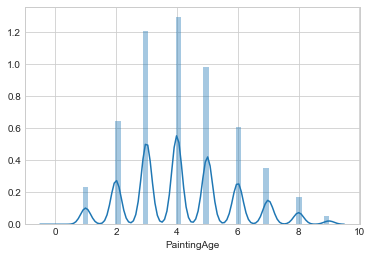

In [4]:
#Answer: Painting age, warranty costs and painting B cost are right skewed, and the acquisition and current prices are all left skewed.  
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
age = sns.distplot(df["PaintingAge"])

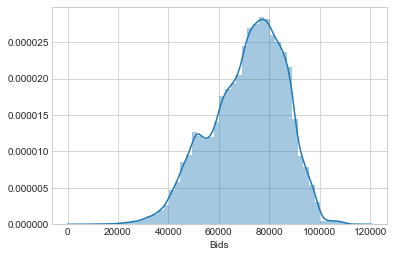

In [5]:
bids = sns.distplot(df["Bids"])

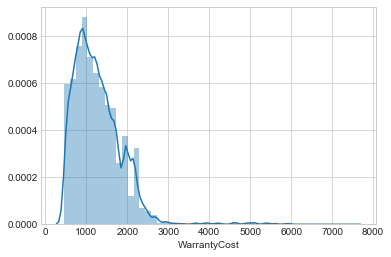

In [6]:
WarrantyCost = sns.distplot(df["WarrantyCost"])

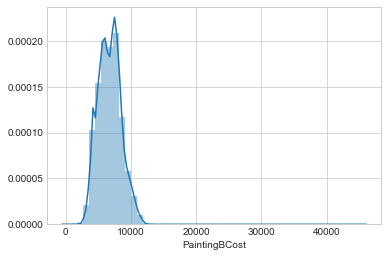

In [7]:
PaintingBCost = sns.distplot(df["PaintingBCost"])

In [8]:
#df = df.dropna(subset=['MMRAcquisitionAuctionAveragePrice'])
#df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].astype(int)
#MMRAcquisitionAuctionAveragePrice = sns.distplot(df["MMRAcquisitionAuctionAveragePrice"])

In [9]:
#df = df.dropna(subset=['MMRAcquisitionAuctionCleanPrice'])
#df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].astype(int)
#MMRAcquisitionAuctionCleanPrice = sns.distplot(df["MMRAcquisitionAuctionCleanPrice"])

In [10]:
#df = df.dropna(subset=['MMRAcquisitionRetailAveragePrice'])
#df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].astype(int)
#MMRAcquisitionRetailAveragePrice = sns.distplot(df["MMRAcquisitionRetailAveragePrice"])

In [11]:
#df = df.dropna(subset=['MMRAcquisitonRetailCleanPrice'])
#df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].astype(int)
#MMRAcquisitonRetailCleanPrice = sns.distplot(df["MMRAcquisitonRetailCleanPrice"])

In [12]:
#df = df.dropna(subset=['MMRCurrentAuctionAveragePrice'])
#df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].astype(int)
#MMRCurrentAuctionAveragePrice = sns.distplot(df["MMRCurrentAuctionAveragePrice"])

In [13]:
#df = df.dropna(subset=['MMRCurrentAuctionCleanPrice'])
#df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].astype(int)
#MMRCurrentAuctionCleanPrice = sns.distplot(df["MMRCurrentAuctionCleanPrice"])

In [14]:
#df = df.dropna(subset=['MMRCurrentRetailAveragePrice'])
#df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].astype(int)
#MMRCurrentRetailAveragePrice = sns.distplot(df["MMRCurrentRetailAveragePrice"])

In [15]:
#df = df.dropna(subset=['MMRCurrentRetailCleanPrice'])
#df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].astype(int)
#MMRCurrentRetailCleanPrice = sns.distplot(df["MMRCurrentRetailCleanPrice"])

## Question 2. feature engineering

### 2a) Drop ID 

In [16]:
df.drop(['RT13Id'],axis=1,inplace = True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 33 columns):
AUCGUART                             3419 non-null object
Artist                               72983 non-null object
Auction                              72983 non-null object
BYRNO                                72983 non-null int64
Bids                                 72983 non-null int64
CanvasColor                          72975 non-null object
FrameType                            69809 non-null object
FrameTypeID                          69814 non-null float64
IsBadBuy                             51088 non-null float64
IsOnlineSale                         72983 non-null int64
MMRAcquisitionAuctionAveragePrice    72965 non-null float64
MMRAcquisitionAuctionCleanPrice      72965 non-null float64
MMRAcquisitionRetailAveragePrice     72965 non-null float64
MMRAcquisitonRetailCleanPrice        72965 non-null float64
MMRCurrentAuctionAveragePrice        72668 non-null float64
MMR

### 2b) Extract the painting categories T1-T13 from Painting Name and subtype. Create new columns for above extracted categories with 1 or 0 as outcome values.


In [17]:
import re
def get_paintingcat(str1,str2):
    r=re.compile(r".*\s(T+\d{1,2}).*")
    if str1!= str1 or str2!= str2:
        return 0
    if r.match(str1):
        return r.match(str1).group(1)
    elif r.match(str2):
        return r.match(str2).group(1)
    else:
        return 0
df['PaintingCategories'] = df.apply(lambda x: get_paintingcat(x.PaintingName,x.SubType), axis=1)
df['PaintingCategories'].value_counts()   
# df1=df[['PaintingName','PaintingCategories']]
# df1

0      21456
T6     20314
T7     10693
T11     4188
T5      3457
T13     3264
T2      2994
T10     2345
T8      1909
T4      1129
T1       571
T12      344
T3       240
T9        79
Name: PaintingCategories, dtype: int64

### 2c) The dataset describes the number of quality checks. to extract this use Painting Name. Each check is described three ways I4,I-4,I4 and I6,I-6,I 6.

In [18]:
df['QualityChecks'] = df['PaintingName'].str.extract('(I\S[4,6]|I[4,6]|I\s[4,6])').fillna(value=0)
df['QualityChecks'].value_counts()

/Users/shirleyzheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0      62957
I4      9070
I-4      804
I6       128
I 4       14
I-6       10
Name: QualityChecks, dtype: int64

### 2d) Painting size is also encoded in painting name and subtype. For example 3.5L . Extract that using grep function.

In [19]:
import re
def get_paintingsize(str1,str2):
    r=re.compile(r".*\s(.*\dL).*")
    if str1!= str1 or str2!= str2:
        return 0
    if r.match(str1):
        return r.match(str1).group(1)
    elif r.match(str2):
        return r.match(str2).group(1)
    else:
        return 0
df['PaintingSize'] = df.apply(lambda x: get_paintingsize(x.PaintingName,x.SubType), axis=1)
df['PaintingSize'] = df['PaintingSize'].replace('4-FI-2.0L', value=0)
df['PaintingSize'] = df['PaintingSize'].replace('/3.3L', value=0)
df['PaintingSize'].value_counts()   

0       32215
3.5L     5047
2.4L     3953
3.0L     3449
2.2L     3192
2.0L     2710
4.2L     2474
3.3L     2455
2.7L     2442
3.8L     2297
4.7L     1907
3.4L     1657
3.9L     1233
3.7L      989
4.0L      961
4.6L      935
5.3L      790
2.3L      653
5.4L      627
5.7L      613
1.6L      392
4.8L      360
4.3L      312
2.5L      293
3.1L      261
1.8L      188
5.6L      165
2.8L      100
5.9L       86
1.9L       62
1.5L       42
6.0L       38
1L         31
3.6L       16
3.2L       15
1.7L       10
2.9L        6
8.1L        2
5.2L        2
4.5L        2
6.2L        1
Name: PaintingSize, dtype: int64

### 2e) Sub Type contains categories of the painting. Genre, History, Still Life, Real Life, Landscape, Portrait and Fine Art. Extract this information.

In [20]:
df['PaintingCategories'] = df['SubType'].str.extract('(Genre|History|Still\sLife|Real\sLife|Landscape|Portrait|Fine\sArt)').fillna(value=0)
df['PaintingCategories'].value_counts()

/Users/shirleyzheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Genre         42228
0             18129
History        4162
Portrait       3296
Landscape      2517
Fine Art       1296
Still Life     1230
Real Life       125
Name: PaintingCategories, dtype: int64

### 2f) Calculate ratio for prices and bids as part of feature engineering. (will execute in later sections)

In [21]:
# df['MMRAcquisitionAuctionAveragePriceRatio'] = df['MMRAcquisitionAuctionAveragePrice']/df['Bids']
# df['MMRAcquisitionAuctionCleanPriceRatio'] = df['MMRAcquisitionAuctionCleanPrice']/df['Bids']  
# df['MMRAcquisitionRetailAveragePriceRatio'] = df['MMRAcquisitionRetailAveragePrice']/df['Bids']  
# df['MMRAcquisitonRetailCleanPriceRatio'] = df['MMRAcquisitonRetailCleanPrice']/df['Bids']  
# df['MMRCurrentAuctionAveragePriceRatio'] = df['MMRCurrentAuctionAveragePrice']/df['Bids']  
# df['MMRCurrentAuctionCleanPriceRatio'] = df['MMRCurrentAuctionCleanPrice']/df['Bids']  
# df['MMRCurrentRetailAveragePriceRatio'] = df['MMRCurrentRetailAveragePrice']/df['Bids']  
# df['MMRCurrentRetailCleanPriceRatio'] = df['MMRCurrentRetailCleanPrice']/df['Bids']  

### 2g) Compute dummmies for factors (Artist, painting Year, CanvasColor,etc). For example convert categorical variables to dummy indicator variables. (will execute in later sections)

In [22]:
# df_Artist = pd.get_dummies(df['Artist'])
# df_Auction = pd.get_dummies(df['Auction'])
# df_PaintingName = pd.get_dummies(df['PaintingName'])
# df_Trim = pd.get_dummies(df['Trim'])
# df_PaintingName = pd.get_dummies(df['PaintingName'])
# df_SubType = pd.get_dummies(df['SubType'])
# df_CanvasColor = pd.get_dummies(df['CanvasColor'])
# df_Market = pd.get_dummies(df['Market'])
# df_CanvasColor = pd.get_dummies(df['CanvasColor'])
# df_FrameType = pd.get_dummies(df['FrameType'])
# df_Nationality = pd.get_dummies(df['Nationality'])
# df_Size = pd.get_dummies(df['Size'])
# df_TopThreeNYCName = pd.get_dummies(df['TopThreeNYCName'])
# df_PRIMEUNIT = pd.get_dummies(df['PRIMEUNIT'])
# df_AUCGUART = pd.get_dummies(df['AUCGUART'])
# df_VNST = pd.get_dummies(df['VNST'])


## Qiestion 3. More feature engineering

### Separating day, month, year from purchase date.

In [23]:
df['Year']=[d.split('/')[2] for d in df.PurchDate]
df['Year']=df['Year'].astype(str).astype(int)
df['Month']=[d.split('/')[0] for d in df.PurchDate]
df['Month']=df['Month'].astype(str).astype(int)
df['Day']=[d.split('/')[1] for d in df.PurchDate]
df['Day']=df['Day'].astype(str).astype(int)
df.head(5)

,AUCGUART,Artist,Auction,BYRNO,Bids,CanvasColor,FrameType,FrameTypeID,IsBadBuy,IsOnlineSale,...,Trim,VNST,VNZIP1,WarrantyCost,PaintingCategories,QualityChecks,PaintingSize,Year,Month,Day
0,NaN,Cai Jin,Christie's,8655,79987,SILVER,Metal,1.0,0.0,0,...,GLS,TX,75236,920,0,0,0,10,4,21
1,NaN,Grandma Moses,Sotheby's,22808,81660,SILVER,Metal,1.0,0.0,0,...,Bas,LA,71119,853,Landscape,0,3.9L,9,4,1
2,NaN,Frida Kahlo,Christie's,20928,81978,SILVER,Metal,1.0,0.0,0,...,XE,FL,32824,1373,Genre,0,0,10,3,31
3,NaN,Leonardo Da Vinci,Sotheby's,21053,77524,GOLD,NaN,NaN,1.0,0,...,Bas,AZ,85226,2508,Genre,0,0,10,6,16
4,NaN,Leonardo Da Vinci,Sotheby's,22916,58506,RED,Wood,2.0,0.0,0,...,LS,CO,80817,671,Genre,0,0,10,11,4


### Fit model 

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 39 columns):
AUCGUART                             3419 non-null object
Artist                               72983 non-null object
Auction                              72983 non-null object
BYRNO                                72983 non-null int64
Bids                                 72983 non-null int64
CanvasColor                          72975 non-null object
FrameType                            69809 non-null object
FrameTypeID                          69814 non-null float64
IsBadBuy                             51088 non-null float64
IsOnlineSale                         72983 non-null int64
MMRAcquisitionAuctionAveragePrice    72965 non-null float64
MMRAcquisitionAuctionCleanPrice      72965 non-null float64
MMRAcquisitionRetailAveragePrice     72965 non-null float64
MMRAcquisitonRetailCleanPrice        72965 non-null float64
MMRCurrentAuctionAveragePrice        72668 non-null float64
MMR

#### Check each feature's effect on IsBadBuy

#### Check NA

In [25]:
df.isnull().any()

AUCGUART                              True
Artist                               False
Auction                              False
BYRNO                                False
Bids                                 False
CanvasColor                           True
FrameType                             True
FrameTypeID                           True
IsBadBuy                              True
IsOnlineSale                         False
MMRAcquisitionAuctionAveragePrice     True
MMRAcquisitionAuctionCleanPrice       True
MMRAcquisitionRetailAveragePrice      True
MMRAcquisitonRetailCleanPrice         True
MMRCurrentAuctionAveragePrice         True
MMRCurrentAuctionCleanPrice           True
MMRCurrentRetailAveragePrice          True
MMRCurrentRetailCleanPrice            True
Market                                True
Nationality                           True
PRIMEUNIT                             True
PaintingAge                          False
PaintingBCost                        False
PaintingNam

#### Auction

In [26]:
print (df[['Auction', 'IsBadBuy']].groupby(['Auction'], as_index=False).mean())
print("Before", df['Auction'].unique())
df['Auction'].unique()
title_auction = {"Christie's": 1,"Sotheby's": 2, "OTHER": 3}
df['Auction'] = df['Auction'].map(title_auction)
print("After", df['Auction'].unique())

      Auction  IsBadBuy
0  Christie's  0.114286
1       OTHER  0.119407
2   Sotheby's  0.152584
Before ["Christie's" "Sotheby's" 'OTHER']
After [1 2 3]


####  Painting Year - to drop

In [27]:
print (df[['PaintingYear', 'IsBadBuy']].groupby(['PaintingYear'], as_index=False).mean())
#Drop painting yeat since it's correlated with painting age.
df.drop(['PaintingYear'], axis=1, inplace = True)

   PaintingYear  IsBadBuy
0          2001  0.284200
1          2002  0.243277
2          2003  0.194799
3          2004  0.152439
4          2005  0.131479
5          2006  0.093576
6          2007  0.077721
7          2008  0.058056
8          2009  0.041667
9          2010  0.000000


#### Painting Age

In [28]:
print (df[['PaintingAge', 'IsBadBuy']].groupby(['PaintingAge'], as_index=False).mean())

   PaintingAge  IsBadBuy
0            0  0.000000
1            1  0.040528
2            2  0.065925
3            3  0.081367
4            4  0.111458
5            5  0.142309
6            6  0.180114
7            7  0.215549
8            8  0.270013
9            9  0.320000


#### Artist

In [29]:
print (df[['Artist', 'IsBadBuy']].groupby(['Artist'], as_index=False).mean())
print('Before', df['Artist'].unique())
#map artist name
artist_name = {"Cai Jin": 1, "Grandma Moses": 2, "Frida Kahlo": 3, "Leonardo Da Vinci": 4,
                 "Michelangelo": 5, "Qu Ding": 6, "Pablo Picasso": 7, "Buick": 8, "Andy Warhol": 9,
       "Raphael": 10, "Jean-Michel BasquiatC": 11, "Cheng": 12, "Boticelli": 13,
       "Michael Judd": 14, "Vincent Van Gogh": 15, "Paul Klee": 16, "Giovanni": 17,
       "Jan Van Eyck": 18, "Titian": 18, "Jackson Pollock": 19, "Bronzio": 20, "Vin": 21,
       "M F Hussain": 22, "Lincoln": 23, "Claude Monet": 24, "Giotto": 25, "Mini": 26,
       "El Grecko": 27, "Sohel": 28, "Caravaggio": 29, "Paul": 30, "Tintorretto": 31,"Michael Judd Boticelli": 32}
df['Artist'] = df['Artist'].map(artist_name)
print('After', df['Artist'].unique())

                    Artist  IsBadBuy
0              Andy Warhol  0.129759
1                Boticelli  0.088889
2                  Bronzio  0.209040
3                    Buick  0.170213
4                  Cai Jin  0.127072
5               Caravaggio  0.350000
6                    Cheng  0.146497
7             Claude Monet  0.192308
8                El Grecko  0.296296
9              Frida Kahlo  0.142487
10                  Giotto  0.363636
11                Giovanni  0.149819
12           Grandma Moses  0.154669
13         Jackson Pollock  0.168453
14            Jan Van Eyck  0.115942
15   Jean-Michel BasquiatC  0.125000
16       Leonardo Da Vinci  0.097452
17                 Lincoln  0.287879
18             M F Hussain  0.000000
19            Michael Judd  0.085396
20  Michael Judd Boticelli       NaN
21            Michelangelo  0.156401
22                    Mini  0.368421
23           Pablo Picasso  0.102697
24                    Paul  0.000000
25               Paul Klee  0.128713
2

#### Painting Name - to drop

In [30]:
print (df[['PaintingName', 'IsBadBuy']].groupby(['PaintingName'], as_index=False).mean())
#Drop painting name since it's messy.
drop_column = ['PaintingName']
df.drop(drop_column, axis=1, inplace = True)

                 PaintingName  IsBadBuy
0       1500 RAM Real Life T1  0.121951
1       1500 RAM Real Life T2  0.098168
2     1500 SIERRA Real Life 2  0.092784
3     1500 SIERRA Real Life 4  0.000000
4        1500 SILVERADO PICKU  0.096244
5     1500HD SIERRA Real Life       NaN
6        1500HD SILVERADO PIC  0.000000
7       2500 RAM Real Life T1  0.000000
8       2500 RAM Real Life T2  0.200000
9        2500 SILVERADO PICKU  0.000000
10    2500HD SIERRA Real Life  0.000000
11       2500HD SILVERADO PIC  0.428571
12                     3.2 CL  0.000000
13       3.2 CL 3.2L V 6 NA S  0.500000
14                     3.2 TL  0.166667
15       3.2 TL 3.2L T6 FI DO  1.000000
16        3.2 TL 3.2L T6 T13I  0.400000
17                        300  0.094972
18            300 2.7L T6 T10  0.059322
19        300 3.5L / 6.0L V12  0.000000
20            300 3.5L T6 T10  0.000000
21       300 3.5L T6 T10 / SM  0.117647
22                       300C  0.333333
23          300C 5.7L T5 T11I       NaN


#### Trim - to drop

In [31]:
print (df[['Trim', 'IsBadBuy']].groupby(['Trim'], as_index=False).mean())
df['Trim'].fillna(0,inplace = True)
print(df["Trim"].unique())
#Drop trim name since there are too little value.
#df.drop(['Trim'], axis=1, inplace = True)

    Trim  IsBadBuy
0      1  0.075000
1    150  0.146226
2      2  0.156080
3    250  0.000000
4      3  0.122302
5    3 R  0.000000
6    Adv  0.098039
7    Bas  0.122866
8      C  0.500000
9     CE  0.091463
10    CX  0.125786
11   CXL  0.118421
12   CXS  0.000000
13   Car  0.333333
14   Cin  0.333333
15   Cla  0.129129
16   Cus  0.194570
17    DE  0.000000
18    DS  0.000000
19    DX  0.277778
20   Den  0.500000
21   Dur  0.500000
22    ES  0.131213
23    EX  0.122530
24   EX-  0.000000
25   Edd  0.164557
26   Edg  0.151515
27   Ent  0.000000
28   Exe  0.333333
29   FX4  0.333333
..   ...       ...
104  Sta  0.117647
105   T5  0.000000
106  Tou  0.134961
107  Ult  0.000000
108   VP  0.210526
109  Val  0.117647
110  W/T  0.102564
111    X  0.111111
112   XE  0.078571
113   XL  0.138264
114  XLS  0.229730
115  XLT  0.190733
116   XR  0.000000
117  XRS  0.000000
118   XS  0.500000
119  Xsp       NaN
120  Z24  1.000000
121  Z71  0.114286
122  ZR2  0.333333
123  ZTS  0.255319
124  ZTW  0.

#### SubType - to drop

In [32]:
print (df[['SubType', 'IsBadBuy']].groupby(['SubType'], as_index=False).mean())
#Drop SubType since there are too little value.
df.drop(['SubType'], axis=1, inplace = True)

                                      SubType  IsBadBuy
0                       2D Fine Art 2.3L EDGE  0.000000
1                         2D Fine Art 2.3L XL  0.000000
2                            2D Fine Art 3.0L  0.000000
3                 2D Fine Art 3.0L DUAL SPORT  0.000000
4             2D Fine Art 3.0L DUAL SPORT FFV  0.000000
5                       2D Fine Art 3.0L EDGE  0.250000
6                         2D Fine Art 3.0L SE  0.000000
7                         2D Fine Art 3.0L XL  0.000000
8                        2D Fine Art 3.0L XLT  0.666667
9                       2D Fine Art 4.0L EDGE  0.000000
10                        2D Fine Art 4.0L XL       NaN
11                                   2D Genre  0.000000
12                                2D Genre GX  0.000000
13                         2D HARTOP other GT  0.000000
14                               2D HATCHBACK  0.212766
15                            2D HATCHBACK GS  0.000000
16                            2D HATCHBACK GT   

#### CanvasColor

In [33]:
print (df[['CanvasColor', 'IsBadBuy']].groupby(['CanvasColor'], as_index=False).mean())
#fill NA
df['CanvasColor'].fillna("NOT AVAIL",inplace = True)
print(df["CanvasColor"].unique())

#Mapping
print("Before", df.shape)
print("Before", df["CanvasColor"].unique())
title_canvascolor = {"SILVER":1, "GOLD":2, "RED":3, "GREY":4, "GREEN":5, "BLACK":6, "BLUE":7, "WHITE":8,
       "PURPLE":9, "MAROON":10, "OTHER":11, "ORANGE":12, "BEIGE":13, "BROWN":14,
       "NOT AVAIL":15, "YELLOW":16}
df["CanvasColor"] = df["CanvasColor"].map(title_canvascolor)
print("After", df["CanvasColor"].unique())
print("After", df.shape)

   CanvasColor  IsBadBuy
0        BEIGE  0.133858
1        BLACK  0.117537
2         BLUE  0.115588
3        BROWN  0.116505
4         GOLD  0.140976
5        GREEN  0.127460
6         GREY  0.114907
7       MAROON  0.134642
8    NOT AVAIL  0.230769
9       ORANGE  0.080420
10       OTHER  0.134969
11      PURPLE  0.129151
12         RED  0.129500
13      SILVER  0.123095
14       WHITE  0.123463
15      YELLOW  0.112500
['SILVER' 'GOLD' 'RED' 'GREY' 'GREEN' 'BLACK' 'BLUE' 'WHITE' 'PURPLE'
 'MAROON' 'OTHER' 'ORANGE' 'BEIGE' 'BROWN' 'NOT AVAIL' 'YELLOW']
Before (72983, 36)
Before ['SILVER' 'GOLD' 'RED' 'GREY' 'GREEN' 'BLACK' 'BLUE' 'WHITE' 'PURPLE'
 'MAROON' 'OTHER' 'ORANGE' 'BEIGE' 'BROWN' 'NOT AVAIL' 'YELLOW']
After [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
After (72983, 36)


#### Market

In [34]:
print (df[['Market', 'IsBadBuy']].groupby(['Market'], as_index=False).mean())
#Fill NA
df['Market'].fillna(df['Market'].mode()[0], inplace = True)
print(df["Market"].unique())

#mapping


           Market  IsBadBuy
0      Commercial  0.123425
1  Non Commercial  0.114618
['Commercial' 'Non Commercial']


In [35]:
title_canvascolor = {"Commercial":1, "Non Commercial":2}
df["Market"] = df["Market"].map(title_canvascolor)
print("After", df["Market"].unique())


After [1 2]


#### FrameTypeID & FrameType - to drop

In [36]:
print (df[['FrameTypeID', 'IsBadBuy']].groupby(['FrameTypeID'], as_index=False).mean())
#fill na
df['FrameTypeID'].fillna(df['FrameTypeID'].mode()[0], inplace = True)
print(df["FrameTypeID"].unique())

#drop frame type
#drop_column = ['FrameType']
#df.drop(drop_column, axis=1, inplace = True)

   FrameTypeID  IsBadBuy
0          0.0  0.000000
1          1.0  0.108508
2          2.0  0.081521
3          3.0  0.118199
[ 1.  2.  3.  0.]


#### Bids

In [37]:
print (df[['Bids', 'IsBadBuy']].groupby(['Bids'], as_index=False).mean())
#categorize bids into 10 range
bids_avg = df['Bids'].mean()
Bids_std = df['Bids'].std()  
df['Bids'] = df['Bids'].astype(int)   
# df['CategoricalBids'] = pd.cut(df['Bids'], 4)
# print (df[['CategoricalBids', 'IsBadBuy']].groupby(['CategoricalBids'], as_index=False).mean())
# # mapping 
# df.loc[(df['Bids'] > 4714.108) &(df['Bids'] <= 27003.4), 'Bids'] = 1
# df.loc[(df['Bids'] > 27003.4) & (df['Bids'] <= 49181.8), 'Bids'] = 2
# df.loc[(df['Bids'] > 49181.8) & (df['Bids'] <= 71360.2), 'Bids'] = 3
# df.loc[(df['Bids'] > 71360.2) & (df['Bids'] <= 93538.6), 'Bids'] = 4
# df.loc[(df['Bids'] > 93538.6) & (df['Bids'] <= 115717.0),'Bids'] = 5
# print("After", df["Bids"].unique())

         Bids  IsBadBuy
0        4825       1.0
1        5368       0.0
2        8706       NaN
3        9446       1.0
4        9878       0.0
5       10095       1.0
6       10643       0.0
7       11662       1.0
8       12628       0.0
9       12926       0.0
10      13445       1.0
11      13924       1.0
12      14187       0.0
13      14474       0.0
14      14519       0.0
15      14547       0.0
16      14961       1.0
17      15249       0.0
18      15409       1.0
19      15655       0.0
20      15743       1.0
21      15894       0.0
22      16545       NaN
23      16574       NaN
24      16713       0.0
25      16833       0.0
26      17281       0.0
27      17502       NaN
28      17538       0.0
29      18440       NaN
...       ...       ...
39917  109260       NaN
39918  109300       0.0
39919  109323       1.0
39920  109330       NaN
39921  109348       NaN
39922  109362       NaN
39923  109366       0.0
39924  109399       0.0
39925  109408       0.0
39926  109451   

#### Nationality

In [38]:
print (df[['Nationality', 'IsBadBuy']].groupby(['Nationality'], as_index=False).mean())
#fill NA
df['Nationality'].fillna("OTHER", inplace = True)
print(df["Nationality"].unique())


      Nationality  IsBadBuy
0        AMERICAN  0.121387
1           OTHER  0.137931
2     OTHER ASIAN  0.132911
3  TOP LINE ASIAN  0.129094
['OTHER ASIAN' 'AMERICAN' 'TOP LINE ASIAN' 'OTHER']


In [39]:
#mapping
nationality = {"OTHER ASIAN":1, "AMERICAN":2, "TOP LINE ASIAN":3, "OTHER":4}
df["Nationality"] = df["Nationality"].map(nationality)
print("After", df["Nationality"].unique())

After [1 2 3 4]


#### Size

In [40]:
print (df[['Size', 'IsBadBuy']].groupby(['Size'], as_index=False).mean())
print("before",df["Size"].unique())
#fill na
df['Size'].fillna(df['Size'].mode()[0], inplace = True)
print(df["Size"].unique())

            Size  IsBadBuy
0        COMPACT  0.158627
1      CROSSOVER  0.102629
2       Enlarged  0.128642
3          LARGE  0.091157
4   LARGE Canvas  0.108902
5    LARGE other  0.158367
6         MEDIUM  0.115824
7   MEDIUM other  0.149629
8   SMALL Canvas  0.136519
9    SMALL other  0.138201
10     SPECIALTY  0.089087
11        Shrink  0.192101
before ['SMALL other' 'Shrink' 'MEDIUM' 'COMPACT' 'MEDIUM other' 'Enlarged'
 'LARGE' 'CROSSOVER' 'LARGE Canvas' 'SPECIALTY' 'SMALL Canvas'
 'LARGE other' nan]
['SMALL other' 'Shrink' 'MEDIUM' 'COMPACT' 'MEDIUM other' 'Enlarged'
 'LARGE' 'CROSSOVER' 'LARGE Canvas' 'SPECIALTY' 'SMALL Canvas'
 'LARGE other']


In [41]:
#mapping
size = {"SMALL other":1, "Shrink":2, "MEDIUM":3, "COMPACT":4, "MEDIUM other":5, "Enlarged":6,
 "LARGE":7, "CROSSOVER":8, "LARGE Canvas":9, "SPECIALTY":10, "SMALL Canvas":11,
 "LARGE other":12}
df["Size"] = df["Size"].map(size)
print("After", df["Size"].unique())

After [ 1  2  3  4  5  6  7  8  9 10 11 12]


#### TopThreeNYCName

In [42]:
print (df[['TopThreeNYCName', 'IsBadBuy']].groupby(['TopThreeNYCName'], as_index=False).mean())
print(df["TopThreeNYCName"].unique())

        TopThreeNYCName  IsBadBuy
0           Andy Warhol  0.116188
1         Grandma Moses  0.156746
2  Jean-Michel Basquiat  0.109109
3                 OTHER  0.131822
['OTHER' 'Grandma Moses' 'Jean-Michel Basquiat' 'Andy Warhol' nan]


In [43]:
#fill na
df['TopThreeNYCName'].fillna("OTHER", inplace = True)
print(df["TopThreeNYCName"].unique())

['OTHER' 'Grandma Moses' 'Jean-Michel Basquiat' 'Andy Warhol']


In [44]:
#mapping
size = {"OTHER":1, "Grandma Moses":2, "Jean-Michel Basquiat":3, "Andy Warhol":4}
df["TopThreeNYCName"] = df["TopThreeNYCName"].map(size)
print("After", df["TopThreeNYCName"].unique())

After [1 2 3 4]


#### PRIMEUNIT

In [45]:
#fill na
df['PRIMEUNIT'].fillna("OTHER", inplace = True)
print(df["PRIMEUNIT"].unique())
print (df[['PRIMEUNIT', 'IsBadBuy']].groupby(['PRIMEUNIT'], as_index=False).mean())
print(df["PRIMEUNIT"].unique())
#mapping
cat = {"OTHER":1, "NO":2, "YES":3}
df["PRIMEUNIT"] = df["PRIMEUNIT"].map(cat)
print("After", df["PRIMEUNIT"].unique())

['OTHER' 'NO' 'YES']
  PRIMEUNIT  IsBadBuy
0        NO  0.037543
1     OTHER  0.127223
2       YES  0.119048
['OTHER' 'NO' 'YES']
After [1 2 3]


#### AUCGUART

In [46]:
#fill na
df['AUCGUART'].fillna("OTHER", inplace = True)
print(df["AUCGUART"].unique())
print (df[['AUCGUART', 'IsBadBuy']].groupby(['AUCGUART'], as_index=False).mean())
print(df["AUCGUART"].unique())
#mapping
COLOR = {"OTHER":1, "GREEN":2, "RED":3}
df["AUCGUART"] = df["AUCGUART"].map(COLOR)
print("After", df["AUCGUART"].unique())

['OTHER' 'GREEN' 'RED']
  AUCGUART  IsBadBuy
0    GREEN  0.037291
1    OTHER  0.127223
2      RED  0.113208
['OTHER' 'GREEN' 'RED']
After [1 2 3]


#### BYRNO

In [47]:
print (df[['BYRNO', 'IsBadBuy']].groupby(['BYRNO'], as_index=False).mean())
print(df["BYRNO"].unique())
df['BYRNO'].fillna(0, inplace = True)
# df['BYRNO'].value_counts()
#df = df.dropna(subset=['BYRNO'])
# df['BYRNO'] = df['BYRNO'].astype(int)
# BYRNO = sns.distplot(df["BYRNO"])

    BYRNO  IsBadBuy
0     835  0.121270
1    1031  0.050000
2    1035  0.000000
3    1041  0.142857
4    1045  0.166667
5    1051  0.056604
6    1055  0.000000
7    1081  0.066667
8    1082  0.000000
9    1085  0.205128
10   1086  0.000000
11   1121  0.166667
12   1125  0.000000
13   1141  0.066667
14   1151  0.043478
15   1152  0.250000
16   1156  0.000000
17   1157       NaN
18   1191  0.135135
19   1231  0.154412
20   1235  0.089506
21   3453  0.119506
22   3582  1.000000
23   5546  0.097294
24   8172  0.118029
25   8655  0.131876
26  10310  0.181818
27  10315  0.102362
28  10410  0.000000
29  10420  0.000000
..    ...       ...
44  18881  0.092245
45  19064  0.132988
46  19619  0.120250
47  19638  0.108979
48  19662  0.126534
49  20207  0.123110
50  20234  0.099798
51  20392  0.180233
52  20740  0.155030
53  20833  0.173975
54  20928  0.096333
55  21047  0.166667
56  21053  0.134755
57  21973  0.120355
58  22808  0.139892
59  22916  0.136272
60  23359  0.167579
61  23657  0.122530


In [48]:
# valuec = df['BYRNO'].value_counts()
# df['BYRCounts'] = df.groupby(['BYRNO'])['BYRNO'].transform('count')
# print(df['BYRCounts'])
#mean = df[['BYRNO', 'IsBadBuy']].groupby(['BYRNO'], as_index=False).mean()
#valuec = pd.DataFrame(valuec)
# mean = pd.DataFrame(mean)
# frames = [valuec, mean]
# result = pd.concat(frames)

#### Prices

In [50]:
#Fill NA
df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(), inplace = True)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].median(), inplace = True)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].median(), inplace = True)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].median(), inplace = True)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(), inplace = True)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].median(), inplace = True)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].median(), inplace = True)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].median(), inplace = True)

#### Ratios

In [51]:
df['MMRAcquisitionAuctionAveragePriceRatio'] = df['MMRAcquisitionAuctionAveragePrice']/df['Bids']
df['MMRAcquisitionAuctionCleanPriceRatio'] = df['MMRAcquisitionAuctionCleanPrice']/df['Bids']  
df['MMRAcquisitionRetailAveragePriceRatio'] = df['MMRAcquisitionRetailAveragePrice']/df['Bids']  
df['MMRAcquisitonRetailCleanPriceRatio'] = df['MMRAcquisitonRetailCleanPrice']/df['Bids']  
df['MMRCurrentAuctionAveragePriceRatio'] = df['MMRCurrentAuctionAveragePrice']/df['Bids']  
df['MMRCurrentAuctionCleanPriceRatio'] = df['MMRCurrentAuctionCleanPrice']/df['Bids']  
df['MMRCurrentRetailAveragePriceRatio'] = df['MMRCurrentRetailAveragePrice']/df['Bids']  
df['MMRCurrentRetailCleanPriceRatio'] = df['MMRCurrentRetailCleanPrice']/df['Bids']  

#### Zipcode & State

In [52]:
#USE VNST
print (df[['VNST', 'IsBadBuy']].groupby(['VNST'], as_index=False).mean())
print(df["VNST"].unique())

   VNST  IsBadBuy
0    AL  0.136735
1    AR  0.218182
2    AZ  0.111188
3    CA  0.132300
4    CO  0.123599
5    FL  0.109764
6    GA  0.104443
7    IA  0.148876
8    ID  0.118881
9    IL  0.149502
10   IN  0.142045
11   KY  0.073171
12   LA  0.138776
13   MA  0.166667
14   MD  0.144608
15   MI  0.100000
16   MN  0.057143
17   MO  0.116883
18   MS  0.096317
19   NC  0.117023
20   NE  0.066667
21   NH  0.089552
22   NJ  0.120000
23   NM  0.119760
24   NV  0.162095
25   NY  0.000000
26   OH  0.078853
27   OK  0.094038
28   OR  0.064286
29   PA  0.167742
30   SC  0.143477
31   TN  0.107631
32   TX  0.136325
33   UT  0.123311
34   VA  0.155844
35   WA  0.076923
36   WV  0.108911
['TX' 'LA' 'FL' 'AZ' 'CO' 'VA' 'OK' 'GA' 'UT' 'SC' 'NC' 'CA' 'TN' 'IN' 'NE'
 'MO' 'IL' 'MD' 'PA' 'NH' 'NV' 'NJ' 'AL' 'IA' 'NM' 'OH' 'WV' 'OR' 'ID' 'MS'
 'KY' 'WA' 'MN' 'NY' 'AR' 'MA' 'MI']


In [53]:
#mapping
st = {"TX":1, "LA":2, "FL":3, "AZ":4, "CO":5, "VA":6, "OK":7, "GA":8, "UT":9, "SC":10, "NC":11, "CA":12, "TN":13, "IN":14, "NE":15,
 "MO":16, "IL":17, "MD":18, "PA":19, "NH":20, "NV":21, "NJ":22, "AL":23, "IA":24, "NM":25, "OH":26, "WV":27, "OR":28, "ID":29, "MS":30,
 "KY":31, "WA":32, "MN":33, "NY":34, "AR":35, "MA":36, "MI":37}
df["VNST"] = df["VNST"].map(st)
print("After", df["VNST"].unique())

After [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37]


#### PaintingCategories, QualityChecks,PaintingSize         

In [54]:
print (df[["PaintingCategories", "IsBadBuy"]].groupby(["PaintingCategories"], as_index=False).mean())
print(df["PaintingCategories"].unique())
#mapping
cat = {0:0, "Landscape":1, "Genre":2, "Portrait":3, "Real Life":4, "Still Life":5, "Fine Art":6, "History":7}
df["PaintingCategories"] = df["PaintingCategories"].map(cat)
print("After", df["PaintingCategories"].unique())

  PaintingCategories  IsBadBuy
0                  0  0.135562
1           Fine Art  0.120746
2              Genre  0.115765
3            History  0.120154
4          Landscape  0.164798
5           Portrait  0.126407
6          Real Life  0.117021
7         Still Life  0.114086
[0 'Landscape' 'Genre' 'Portrait' 'Real Life' 'Still Life' 'Fine Art'
 'History']
After [0 1 2 3 4 5 6 7]


In [55]:
print (df[["QualityChecks", "IsBadBuy"]].groupby(["QualityChecks"], as_index=False).mean())
print(df["QualityChecks"].unique())
#mapping
cat = {0:0, "I4":1, "I-4":1, "I6":2, "I 4":1, "I-6":2}
df["QualityChecks"] = df["QualityChecks"].map(cat)
print("After", df["QualityChecks"].unique())

  QualityChecks  IsBadBuy
0             0  0.124131
1           I 4  0.300000
2           I-4  0.152364
3           I-6  0.333333
4            I4  0.113672
5            I6  0.072165
[0 'I4' 'I-4' 'I6' 'I 4' 'I-6']
After [0 1 2]


In [56]:
print (df[["PaintingSize", "IsBadBuy"]].groupby(["PaintingSize"], as_index=False).mean())
print(df["PaintingSize"].unique())
#mapping
cat = {0:0, "3.9L":3, "4.2L":4, "2.0L":2, "3.3L":3, "3.5L":3, "3.0L":3, "4.0L":4, "2.4L":2, "5.3L":5, "2.2L":2,
 "4.7L":4, "3.7L":3, "3.4L":3, "5.4L":5, "3.8L":3, "2.7L":2, "1.8L":1, "5.7L":5, "4.8L":4, "2.3L":2,
 "4.6L":4, "2.5L":2, "2.8L":2, "5.6L":5, "1.6L":1, "3.1L":3, "5.9L":5, "4.3L":4, "6.0L":6, "1.9L":1,
 "3.6L":3, "1.5L":1, "1L":1, "1.7L":1, "2.9L":2, "4.5L":4, "3.2L":3, "6.2L":6, "5.2L":5, "8.1L": 8}
df["PaintingSize"] = df["PaintingSize"].map(cat)
print("After", df["PaintingSize"].unique())

   PaintingSize  IsBadBuy
0             0  0.129752
1          1.5L  0.083333
2          1.6L  0.170213
3          1.7L  0.000000
4          1.8L  0.117647
5          1.9L  0.166667
6            1L  0.043478
7          2.0L  0.129283
8          2.2L  0.100407
9          2.3L  0.106095
10         2.4L  0.117690
11         2.5L  0.152381
12         2.7L  0.072009
13         2.8L  0.054795
14         2.9L  0.000000
15         3.0L  0.141127
16         3.1L  0.267760
17         3.2L  0.307692
18         3.3L  0.113504
19         3.4L  0.155052
20         3.5L  0.070733
21         3.6L  0.100000
22         3.7L  0.109649
23         3.8L  0.138226
24         3.9L  0.104089
25         4.0L  0.224060
26         4.2L  0.119115
27         4.3L  0.120536
28         4.5L  0.000000
29         4.6L  0.173979
30         4.7L  0.106657
31         4.8L  0.081395
32         5.2L  0.000000
33         5.3L  0.118280
34         5.4L  0.220225
35         5.6L  0.066038
36         5.7L  0.064220
37         5

In [57]:
#drop zipcode
drop_column = ['PurchDate']
df.drop(drop_column, axis=1, inplace = True)

In [58]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 43 columns):
AUCGUART                                  72983 non-null int64
Artist                                    72983 non-null int64
Auction                                   72983 non-null int64
BYRNO                                     72983 non-null int64
Bids                                      72983 non-null int64
CanvasColor                               72983 non-null int64
FrameType                                 69809 non-null object
FrameTypeID                               72983 non-null float64
IsBadBuy                                  51088 non-null float64
IsOnlineSale                              72983 non-null int64
MMRAcquisitionAuctionAveragePrice         72983 non-null float64
MMRAcquisitionAuctionCleanPrice           72983 non-null float64
MMRAcquisitionRetailAveragePrice          72983 non-null float64
MMRAcquisitonRetailCleanPrice             72983 non-null floa

In [59]:
#drop CategoricalBids!!!
# drop_column = ['CategoricalBids']
# df.drop(drop_column, axis=1, inplace = True)

In [60]:
for col in df.dtypes[df.dtypes == 'object'].index:
   for_dummy = df.pop(col)
   df = pd.concat([df, pd.get_dummies(for_dummy, prefix=col)], axis=1)

## Fit Model

In [61]:
#drop_elements = ['VNST', 'PaintingSize']
#df = df.drop(drop_elements,axis=1)
train_ds= df[:train_len]
test_ds = df[train_len:]
#train_ds['IsBadBuy'] = train_ds['IsBadBuy'].fillna(0)
np.random.seed(1111)
train, test = np.split(train_ds.sample(frac=1), [int(.7*len(train_ds))])
print(train.shape, test.shape)

(35761, 179) (15327, 179)


In [62]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51088 entries, 0 to 51087
Columns: 179 entries, AUCGUART to Trim_s
dtypes: float64(19), int64(22), uint8(138)
memory usage: 22.7 MB


In [63]:
X_train = train.drop(labels=["IsBadBuy"],axis=1)
y_train = train["IsBadBuy"].astype(int)
X_test = test.drop(labels=["IsBadBuy"],axis=1)
y_test = test["IsBadBuy"].astype(int)

In [64]:
print('len x train', len(X_train))
print('len x test', len(X_test))
print('len y train', len(y_train))
print('len y test', len(y_test))

len x train 35761
len x test 15327
len y train 35761
len y test 15327


### Check the performances (accuracy) of each model

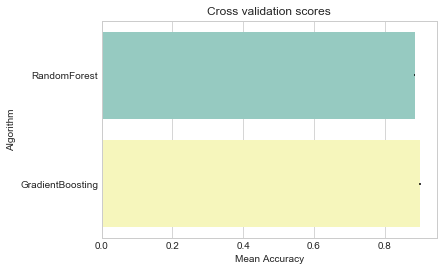

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

## Separate train dataset and test dataset
test.drop(labels=["IsBadBuy"],axis = 1,inplace=True)

## Separate train features and label 
train["IsBadBuy"] = train["IsBadBuy"].astype(int)
Y_train = train["IsBadBuy"]
X_train = train.drop(labels = ["IsBadBuy"],axis = 1)

kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
# classifiers.append(SVC(random_state=random_state))
# classifiers.append(DecisionTreeClassifier(random_state=random_state))
# classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
# classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
# classifiers.append(MLPClassifier(random_state=random_state))
# classifiers.append(KNeighborsClassifier())
# classifiers.append(LogisticRegression(random_state = random_state))
# classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

# cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
# "RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["RandomForest","GradientBoosting"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


### Method 1: use combined model of RandomForest and GradientBoosting

In [69]:
# # RFC Parameters tunning 
# RFC = RandomForestClassifier()


# ## Search grid for optimal parameters
# rf_param_grid = {"max_depth": [None],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [False],
#               "n_estimators" :[100,300],
#               "criterion": ["gini"]}


# gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# gsRFC.fit(X_train,Y_train)

# RFC_best = gsRFC.best_estimator_

# # Best score
# gsRFC.best_score_

In [70]:
# # Gradient boosting tunning

# GBC = GradientBoostingClassifier()
# gb_param_grid = {'loss' : ["deviance"],
#               'n_estimators' : [100,200,300],
#               'learning_rate': [0.1, 0.05, 0.01],
#               'max_depth': [4, 8],
#               'min_samples_leaf': [100,150],
#               'max_features': [0.3, 0.1] 
#               }

# gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# gsGBC.fit(X_train,Y_train)

# GBC_best = gsGBC.best_estimator_

# # Best score
# gsGBC.best_score_

### Feature Importance

In [94]:
# nrows = ncols = 2
# fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

# names_classifiers = [("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

# nclassifier = 0
# for row in range(nrows):
#     for col in range(ncols):
#         name = names_classifiers[nclassifier][0]
#         classifier = names_classifiers[nclassifier][1]
#         indices = np.argsort(classifier.feature_importances_)[::-1][:40]
#         g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
#         g.set_xlabel("Relative importance",fontsize=12)
#         g.set_ylabel("Features",fontsize=12)
#         g.tick_params(labelsize=9)
#         g.set_title(name + " feature importance")
#         nclassifier += 1

## Ensemble Modeling

In [73]:
# votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('gbc',GBC_best)], voting='soft', n_jobs=4)
# votingC = votingC.fit(X_train, y_train)

## Method 2: Random Forest Prediction (higher accuracy)

### used optimal parameters based on the cross validation result. 

In [78]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21895 entries, 51088 to 72982
Columns: 179 entries, AUCGUART to Trim_s
dtypes: float64(19), int64(22), uint8(138)
memory usage: 9.7 MB


In [79]:
test_data = test_ds.drop('IsBadBuy',axis=1)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21895 entries, 51088 to 72982
Columns: 178 entries, AUCGUART to Trim_s
dtypes: float64(18), int64(22), uint8(138)
memory usage: 9.6 MB


In [91]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=4, n_estimators=350)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.893455992693


### Prediction

In [90]:
y_pred = clf.predict(test_data)
len(y_pred)
submission = pd.DataFrame({'RT13Id':IDtest, 'IsBadBuy':y_pred})
submission.to_csv('Xiuhui_Zheng_xz2625.csv', index=False)

In [88]:
# y_pred = pd.Series(votingC.predict(test_data), name="IsBadBuy")
# len(y_pred)
# submission = pd.concat([IDtest,y_pred],axis=1)
# submission.to_csv('Xiuhui_Zheng_xz2625.csv', index=False)

## Question 4.  Given more time, improved data, better com-puting power, etc . How would you improve your model in the future.

#### For this model I mainly tried 2 different methods: 
#### 1. grid search optimization on the best performance models based on the cross validation scores. Then combine the best models using voting classifier 

#### 2. predict using random forest model and tune the parameters based on cross validation results. 

#### The limitation of the first method was that it took my computer tremendous amount of time to finish the process, so it was difficult to adjust the model within limited time. So I finally used the second method to get the highest score, which was more efficient. If given more time, I would further explore the feature engineering process and create several more features based on observations from the existing data. I would also try more models and add more of them to the ensemble model to improve accuracy. In addition, I would explore more ways to improve the dataset and tune the parameters to improve the final result.  